In [1]:
import SMF_BCD as SMF
import numpy as np
from plotting import *

In [2]:
X = np.loadtxt("Output/A.txt")
Y = np.loadtxt("Output/y.txt")[:, np.newaxis]
Xtest = np.loadtxt("Output/At.txt")
Ytest = np.loadtxt("Output/yt.txt")[:, np.newaxis]

print(X.shape)
print(f"Caltech: {np.sum(X[:,:1000])}")
print(f"UCLA: {np.sum(X[:,1001:])}")

(900, 2500)
Caltech: 142816.0
UCLA: 127238.0


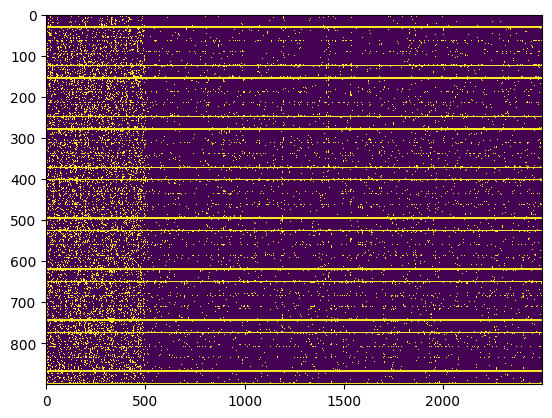

In [3]:
plt.imshow(X, interpolation='nearest', aspect='auto')

In [4]:
SMF_Train = SMF.SDL_BCD([X, Y.T], X_test=[Xtest, Ytest.T], xi=5, n_components=16)

initial loading beta [[-0.50378231 -0.92570268 -0.30861491 -0.35631643 -0.71787128 -0.24809808
   0.76555534  0.91434408  0.54263944  0.00525231 -0.4388452  -0.74443869
  -0.72711385 -0.11648036  0.66664976 -0.62610182  0.17018172]]


In [5]:
results_dict_new = SMF_Train.fit(iter=250, subsample_size=None, option = "filter",# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=True, if_validate=True)

  1%|█▍                                                                                                                   | 3/250 [00:00<00:19, 12.72it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.655), np.float64(1.0)]
--- Iteration 0: Training loss --- [Data, Label, Total] = [160956.882143.3, 75.593346.3, 804860.004060.3]


  4%|████▋                                                                                                               | 10/250 [00:00<00:13, 17.26it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.717), np.float64(1.0)]
--- Iteration 10: Training loss --- [Data, Label, Total] = [103877.573537.3, 59.933550.3, 519447.801233.3]
!!! pred_type filter


  4%|████▋                                                                                                               | 10/250 [00:01<00:41,  5.82it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.717), np.float64(1.0), np.float64(0.992), np.float64(0.995)]
!!! --- Validation (Stopped) --- [threshold, ACC] =  [np.float64(0.717), np.float64(0.992)]
!!! pred_type filter


In [6]:
W = results_dict_new.get('loading')[0]
print(f"Shape of dictionaries: {W.shape}")
beta = results_dict_new.get('loading')[1]
print(f"Shape of regression coefficients: {beta.shape}")

Shape of dictionaries: (900, 16)
Shape of regression coefficients: (1, 17)


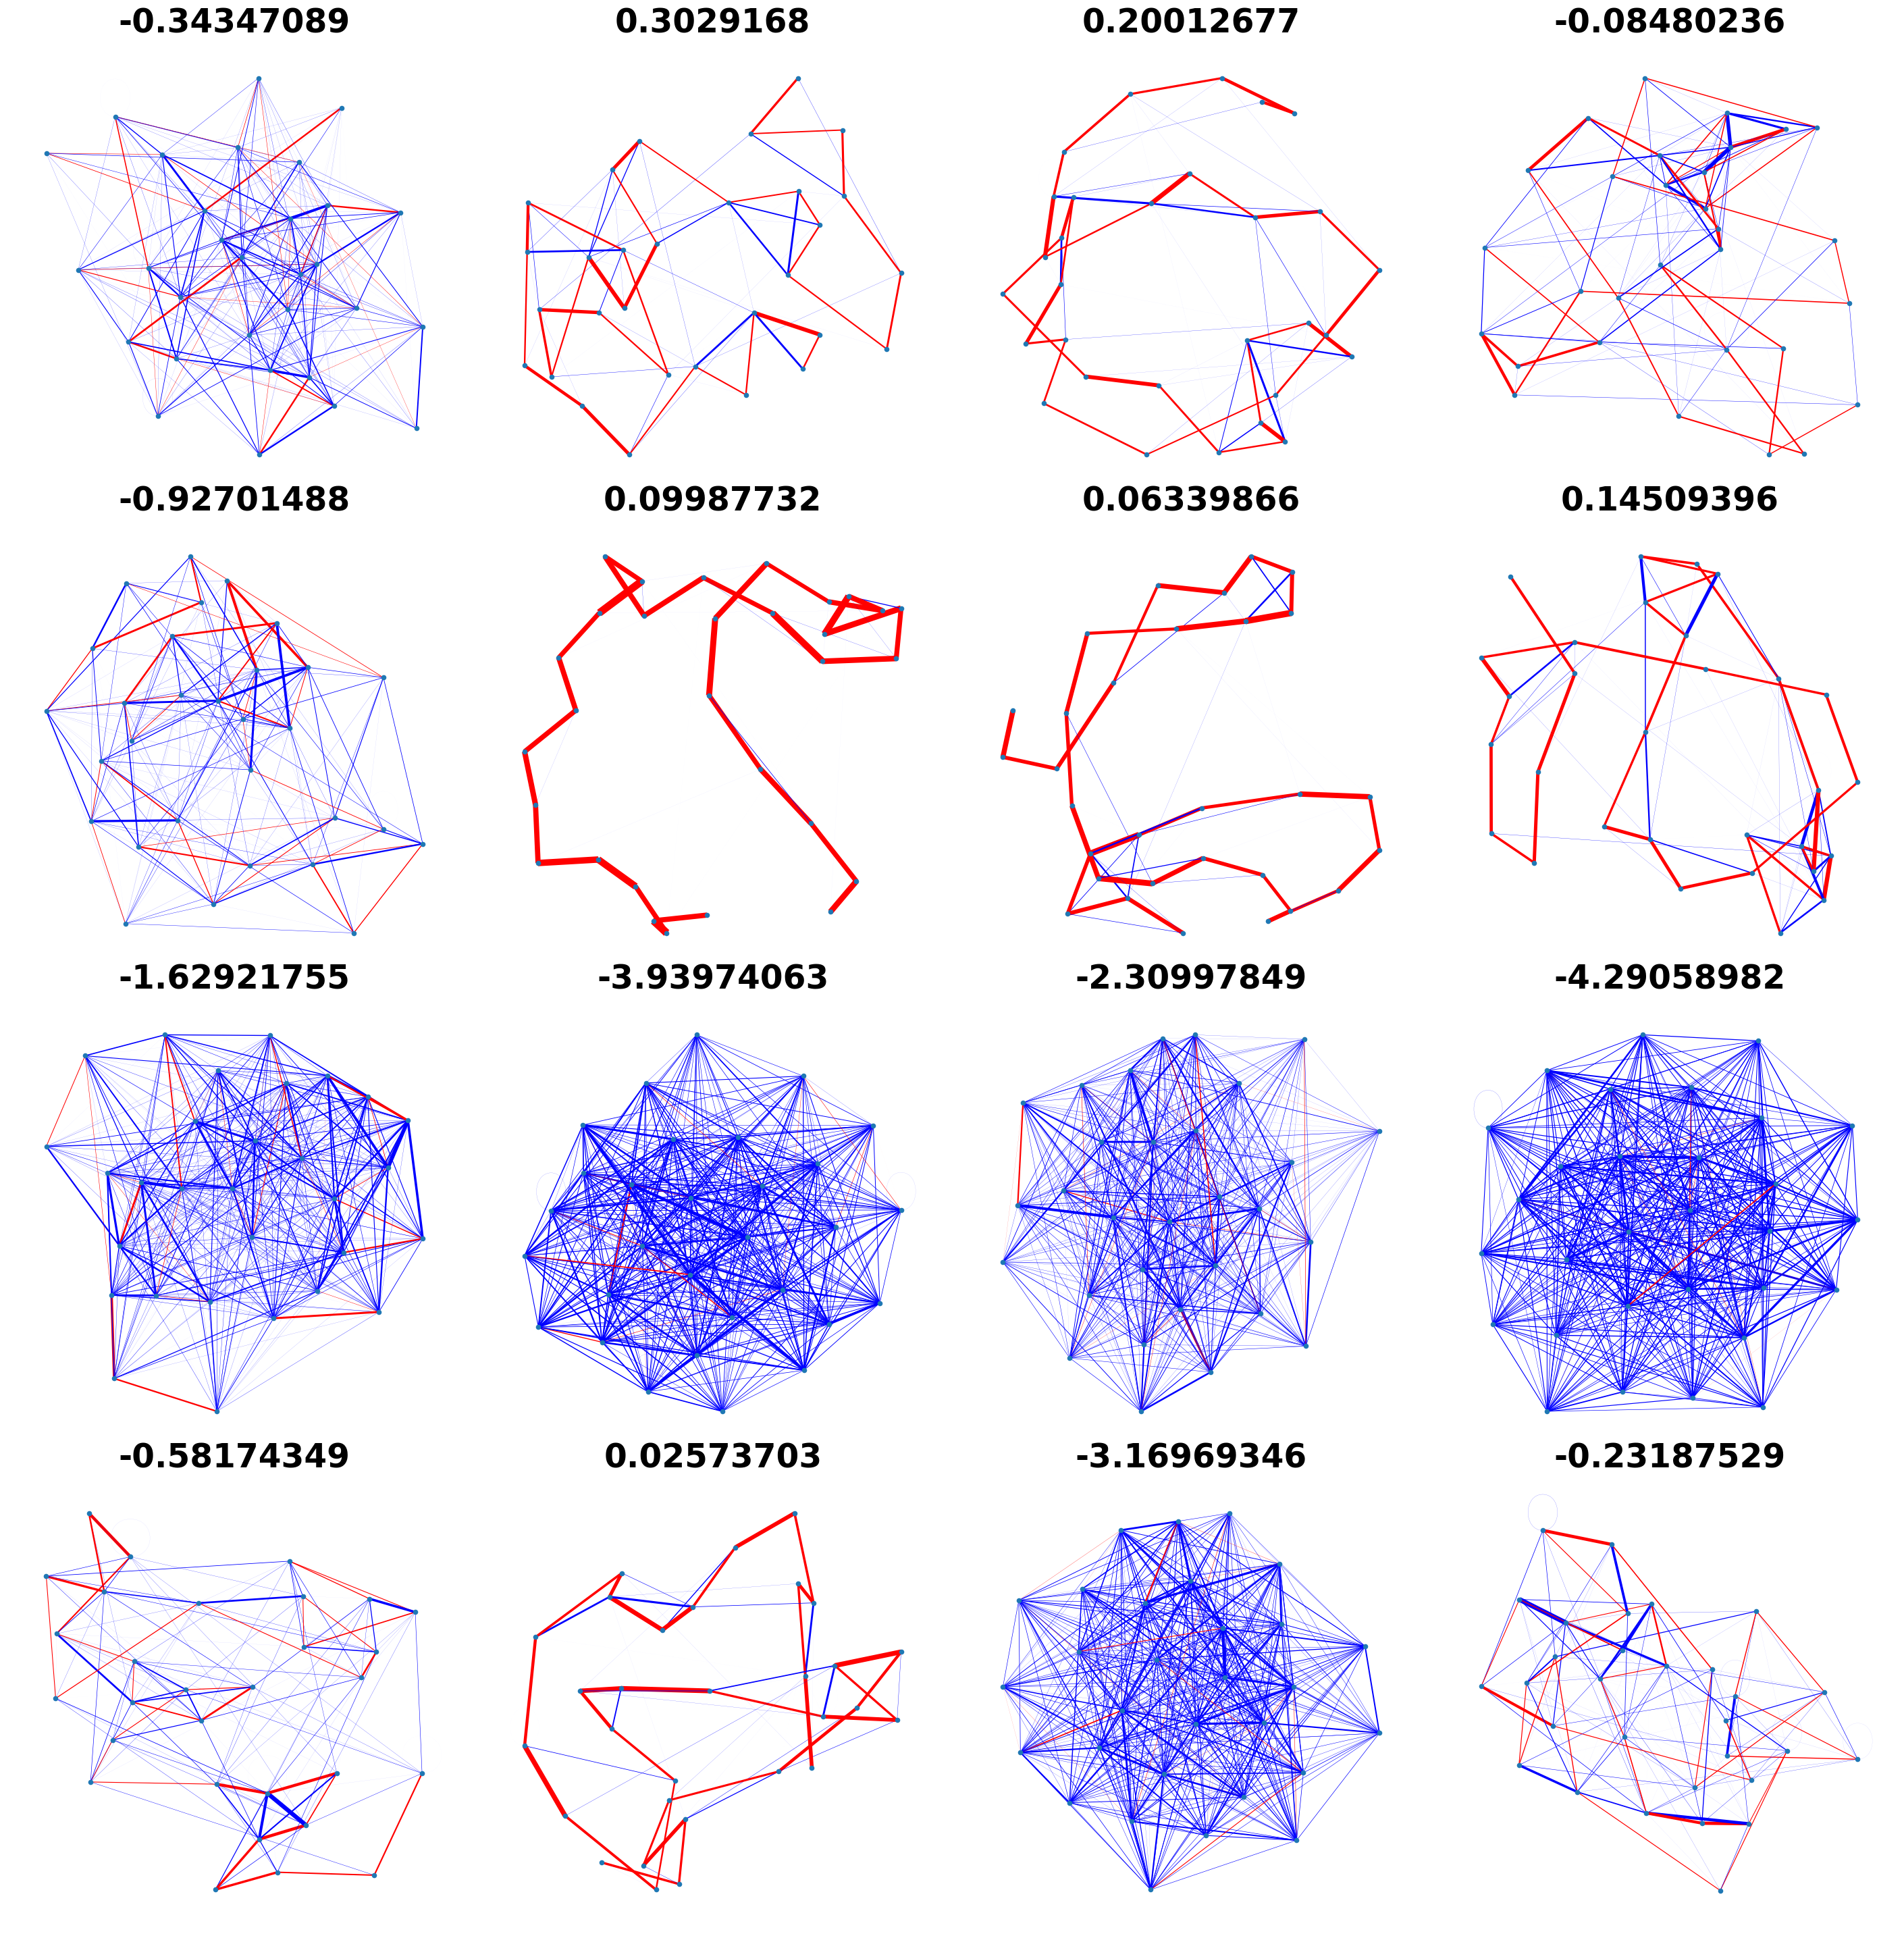

In [7]:
## Visualize dictionaries
display_dict_and_graph(save_path='Output/Cal_UCLA_1000_2500', W=W, regression_coeff=beta.T, fig_size=[35,35], plot_graph_only=True)

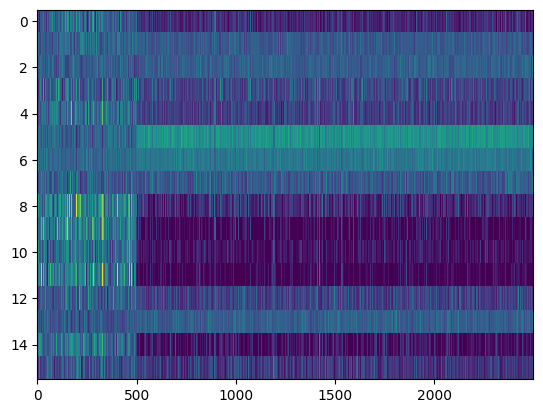

In [8]:
plt.imshow(results_dict_new.get('code'), interpolation='nearest', aspect='auto')

In [39]:
beta

array([[ 1.33444391e+01, -5.49616765e+00, -2.44669920e-01,
        -1.36190911e-01, -4.93702727e-02, -5.12458870e-01,
        -9.19258681e-03, -1.43724012e-01, -7.26707426e-01,
        -4.81404855e-01, -7.46515107e-02, -1.27864436e-01,
         8.35240960e-02, -3.33045422e-02, -2.75636506e-01,
         1.18292811e-01, -4.34767748e+00]])

In [40]:
W

array([[0.00000000e+00, 0.00000000e+00, 4.67730382e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.30584402e-03, 2.77346543e-02, 1.08235283e-02, ...,
        8.16241983e-03, 4.25456567e-02, 0.00000000e+00],
       [2.35550700e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.59233032e-03, 1.74504525e-02, 0.00000000e+00, ...,
        2.45324868e-02, 0.00000000e+00, 2.41506450e-03],
       [0.00000000e+00, 9.55450057e-03, 2.20641478e-02, ...,
        2.31781964e-02, 3.63149244e-02, 1.60729457e-02],
       [0.00000000e+00, 1.71693943e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [9]:
X = np.loadtxt("Output/A2.txt")

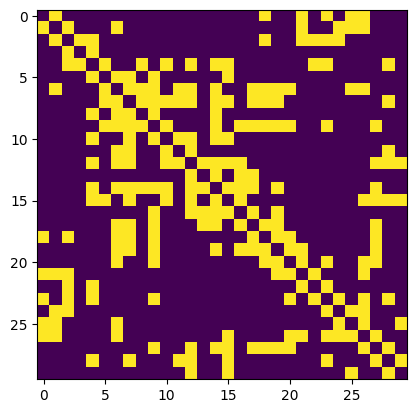

In [10]:
plt.imshow(X[:,1001].reshape(30,30), interpolation='nearest')

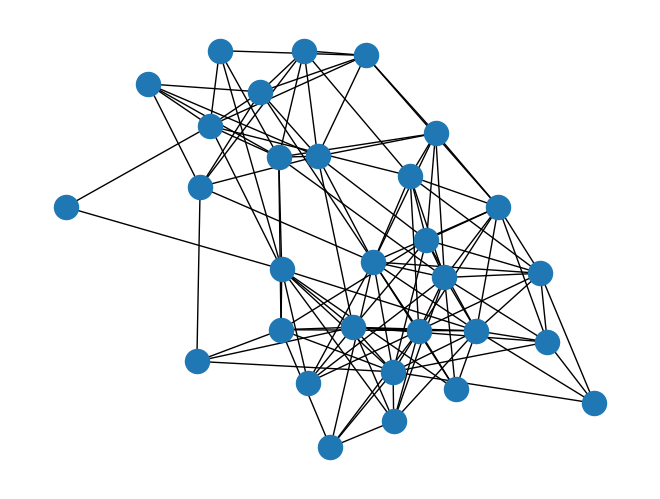

In [11]:
G = nx.from_numpy_array(X[:,1001].reshape(30,30))
nx.draw(G)

In [12]:
W.T @ X[:,1001]
# this is a proximity 

array([0.92214957, 1.50432395, 1.59232697, 1.25451217, 1.13651138,
       3.55378992, 2.64574266, 1.95187956, 1.482501  , 1.68986131,
       1.08561534, 1.59579536, 1.28332578, 2.04331672, 1.30723089,
       1.05275569])

In [13]:
a = beta[:,1:] @ W.T @ X[:,1001] + beta[:,0]
a

array([-10.87296078])

In [14]:
1/(1+np.exp(-a))

array([1.89637794e-05])

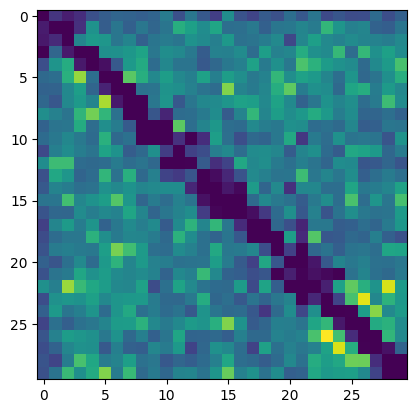

In [47]:
plt.imshow(W[:,0].reshape(30,30), interpolation='nearest')
# These are the filters that we learned

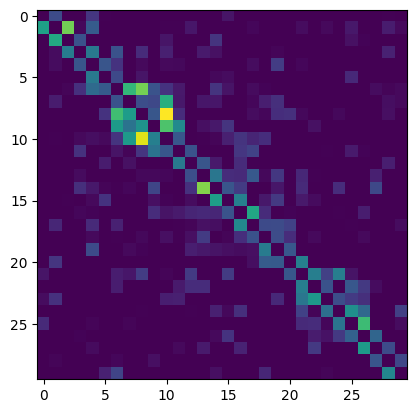

In [48]:
plt.imshow(W[:,2].reshape(30,30), interpolation='nearest')